In [1]:
from bs4 import BeautifulSoup
import requests

In [2]:
naver_raw = requests.get("https://www.naver.com")
soup = BeautifulSoup(naver_raw.text, "html.parser")

In [4]:
css_soup = soup.select("#NM_FAVORITE > div.group_nav > ul.list_nav.type_fix")
css_list = css_soup[0].find_all("a")
for i in css_list:
    print(i.text)

메일
카페
블로그
지식iN
쇼핑
쇼핑LIVE
Pay
TV


In [ ]:
# 실습
# select 를 이용해 naver 지식인에서 선릉역 맛집을 입력한 결과를 (제목, 등록일, 요약)
# dataframe에 저장하세요.

# 추가 실습 :검색어를 입력받고 출력하도록 해보세요.

In [6]:
link = requests.get("https://kin.naver.com/search/list.naver?query=%EC%84%A0%EB%A6%89%EC%97%AD+%EB%A7%9B%EC%A7%91")
soup = BeautifulSoup(link.text, "html.parser")

In [83]:
link_soup = soup.select("#s_content > div.section > ul > li:nth-child(1) > dl ")
link_list = link_soup[0].find_all("a")[0]
for i in link_list:
    print(i.text)   

선릉역 맛집
 끝판왕인 곳 어디에 있을까요?


In [44]:
link_soup = soup.select("#s_content > div.section > ul > li:nth-child(1) > dl ")
link_list = link_soup[0].find_all("dd", {"class":"txt_inline"})
for i in link_list:
    print(i.text)

2022.11.24.


In [68]:
link_soup = soup.select("#s_content > div.section > ul > li:nth-child(1) > dl > dd ")
link_list = link_soup[1:2]
for i in link_list:
    print(i.text)

선릉역 맛집 어디가 괜찮을까요? 썸녀가 스페인 유학생인데 스페인 요리를 좋아해요 ㅎㅎ 그래서 선릉역 맛집을... 선릉역 맛집하면 단연코 여기가 1번지라고 자부할 수 있어요.... 


In [ ]:
link = requests.get("https://kin.naver.com/search/list.naver?query=%EC%84%A0%EB%A6%89%EC%97%AD+%EB%A7%9B%EC%A7%91")
soup = BeautifulSoup(link.text, "html.parser")

for i in range(1,11):
    link_A = soup.select(f"#s_content > div.section > ul > li:nth-child({i}) > dl ")[0].find_all("a")
    link_B = soup.select(f"#s_content > div.section > ul > li:nth-child({i}) > dl ")[0].find_all("dd",{"class":"txt_inline"})
    link_C = soup.select(f"#s_content > div.section > ul > li:nth-child({i}) > dl > dd ")[1:2]

    for naver_link_A , naver_link_B , naver_link_C in zip(link_A,link_B,link_C):
            print(naver_link_A.text, naver_link_B.text)
            print(naver_link_C.text)
            print("")

In [176]:
user_value = input("검색어를 입력하세요 :")
from urllib import parse
user_input = parse.quote(user_value)

In [179]:
user_value = input("검색어를 입력하세요 :")
user_input = user_value.replace(" ", "+")

In [181]:
link = requests.get(f"https://kin.naver.com/search/list.naver?query={user_input}")
soup = BeautifulSoup(link.text, "html.parser")

ul_soup = soup.select("#s_content > div.section > ul")
li_soup = ul_soup[0].find_all("li")


kin = []
for i in li_soup:
    title = i.find("dt").text.replace("\n", "")
    date  = i.find_all("dd")[0].text
    cont = i.find_all("dd")[1].text
    kin.append({"제목": title, "날짜": date, "내용":cont})


In [ ]:
pd.DataFrame(kin)

In [150]:
li_soup[0].find_all("dd")[1]

<dd><b>선릉역 맛집</b> 어디가 괜찮을까요? 썸녀가 스페인 유학생인데 스페인 요리를 좋아해요 ㅎㅎ 그래서 <b>선릉역 맛집</b>을... <b>선릉역 맛집</b>하면 단연코 여기가 1번지라고 자부할 수 있어요.... </dd>

In [183]:
# 일자별 차트 크롤링 
# 1등 가져오기
# 전체 순위가져오기 

In [ ]:
#순위에 따라서 점수 부여 
# 1등 -> 100점 , 100등 -> 1점

In [ ]:
# 특정 기간내에 차트 진입 점수 계산 
# 예) 15일간 차트 분석 
#   

In [431]:
music_value = input("날짜 : ")
headers = {"User-Agent":'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36'}
url = f"https://music.bugs.co.kr/chart/track/day/total?chartdate={music_value}"
html = requests.get(url, headers = headers)
soup = BeautifulSoup(html.text, "html.parser")

musicbank = []
for i in range (1,101):
    bug_soup = soup.select(f"#CHARTday > table > tbody >  tr:nth-child({i})")[0]
    
    rank = f"{i}등"
    title = bug_soup.find("p", {"class":"title"}).text.replace("\n", "")
    singer = bug_soup.find("p", {"class":"artist"}).text.replace("\n", "")
    musicbank.append({"등수":rank,"제목": title,"가수":singer})

M_b =pd.DataFrame(musicbank)
M_b.columns
M_b['점수'] = M_b.index-100
M_b['점수'] = abs(M_b['점수'])
M_b = M_b.set_index("등수")
M_b2 = M_b.groupby("가수").sum()
M_b2 = M_b2.sort_values("점수",ascending=False)

/tmp/ipykernel_727/518713264.py:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  M_b2 = M_b.groupby("가수").sum()


In [432]:
M_b2

,점수
가수,
NewJeans,272
IVE (아이브),265
카라(Kara),246
LE SSERAFIM (르세라핌),222
Charlie Puth(찰리 푸스),207
...,...
케이시,7
Kelly Clarkson(켈리 클락슨),6
릴러말즈 (Leellamarz)\r릴러말즈 (Leellamarz)\r,5


In [442]:
!pip install tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 2.6 MB/s eta 0:00:00


In [520]:
from tqdm import tqdm
import pandas as pd 
sdt=input("시작일 입력:")
edt=input("종료일 입력:")

dates = pd.date_range(sdt, edt)
dates = [i.strftime("%Y%m%d") for i in dates]
df_bugs = pd.DataFrame()

for date in tqdm(dates):
    headers = {"User-Agent":'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36'}
    url = f"https://music.bugs.co.kr/chart/track/day/total?chartdate=" + str(date)
    html = requests.get(url, headers = headers)
    soup = BeautifulSoup(html.text, "html.parser")

    musicbank = []
    for i in range (1,101):
        bug_soup = soup.select(f"#CHARTday > table > tbody >  tr:nth-child({i})")[0]

        rank = f"{i}등"
        title = bug_soup.find("p", {"class":"title"}).text.replace("\n", "")
        singer = bug_soup.find("p", {"class":"artist"}).text.replace("\n", "")
        musicbank.append([date, rank, title, singer])
    
    M_b =pd.DataFrame(musicbank, columns=["날짜", "순위", "곡명","아티스트"])
    M_b['점수'] = M_b.index-100
    M_b['점수'] = abs(M_b['점수'])
    df_bugs = pd.concat([df_bugs, M_b])
    

100%|██████████| 11/11 [00:36<00:00,  3.35s/it]


In [521]:
df_bugs

,날짜,순위,곡명,아티스트,점수
0,20221201,1등,사건의 지평선,윤하(Younha/ユンナ),100
1,20221201,2등,WHEN I MOVE,카라(Kara),99
2,20221201,3등,Hype Boy,NewJeans,98
3,20221201,4등,ANTIFRAGILE,LE SSERAFIM (르세라핌),97
4,20221201,5등,After LIKE,IVE (아이브),96
...,...,...,...,...,...
95,20221211,96등,아저씨,릴러말즈 (Leellamarz)\r릴러말즈 (Leellamarz)\r,5
96,20221211,97등,That That (prod. & feat. SUGA of BTS),싸이 (PSY),4
97,20221211,98등,Last Christmas,Wham!(왬),3
98,20221211,99등,MY BAG,(여자)아이들,2


In [528]:
df_bugs_top = df_bugs.reset_index()
df_bugs_top = df_bugs.groupby("아티스트").sum().sort_values("점수", ascending=False).head(10)
df_bugs_top

/tmp/ipykernel_727/716499420.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_bugs_top = df_bugs.groupby("아티스트").sum().sort_values("점수", ascending=False).head(10)


,점수
아티스트,
NewJeans,2963
IVE (아이브),2901
카라(Kara),2718
LE SSERAFIM (르세라핌),2484
Red Velvet (레드벨벳),2483
Charlie Puth(찰리 푸스),2243
윤하(Younha/ユンナ),2051
BLACKPINK,1895
(여자)아이들,1888


In [ ]:
import matplotlib.pyplot as plt
import platform


top_10.plot.bar()
plt.figure(figsize=(10,4))
plt.xticks(size=9, rotation=45)
plt.bar(top_10.index, top_10["점수"])
plt.title(f"12month most artist({sdt}~{edt})", size=15)
plt.ylabel("mark")
plt.show()

In [524]:
df_bugs_values = df_bugs.groupby(["아티스트", "날짜"]).sum().sort_values("점수", ascending=False)

/tmp/ipykernel_727/2881660442.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_bugs_values = df_bugs.groupby(["아티스트", "날짜"]).sum().sort_values("점수", ascending=False)


In [529]:
df_bugs_values_top = df_bugs_values.loc[df_bugs_top.index]

In [530]:
df_bugs_values

점수
아티스트                   날짜           
Red Velvet (레드벨벳)      20221201  370
                       20221202  294
카라(Kara)               20221207  279
                       20221208  278
                       20221205  274
...                              ...
Alessia Cara(알레시아 카라)  20221203    1
Kelly Clarkson(켈리 클락슨) 20221209    1
                       20221210    1
RM                     20221205    1
싸이 (PSY)               20221207    1

[795 rows x 1 columns]

In [531]:
df_bugs_values_top = df_bugs_values_top.reset_index()

In [532]:
df_bugs_values_top

,아티스트,날짜,점수
0,NewJeans,20221210,274
1,NewJeans,20221211,272
2,NewJeans,20221202,272
3,NewJeans,20221203,271
4,NewJeans,20221209,270
...,...,...,...
105,BE'O (비오),20221203,122
106,BE'O (비오),20221210,121
107,BE'O (비오),20221207,121
108,BE'O (비오),20221204,120


In [533]:
df_bugs_values_top_pivot = df_bugs_values_top.pivot("아티스트","날짜","점수")

/tmp/ipykernel_727/2688928874.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_bugs_values_top_pivot = df_bugs_values_top.pivot("아티스트","날짜","점수")


In [534]:
df_bugs_values_top_pivot.fillna(0)

날짜,20221201,20221202,20221203,20221204,20221205,20221206,20221207,20221208,20221209,20221210,20221211
아티스트,,,,,,,,,,,
(여자)아이들,178,182,175,169,168,166,168,168,173,173,168
BE'O (비오),133,128,122,120,125,127,121,123,125,121,120
BLACKPINK,176,176,174,169,170,173,171,172,173,171,170
Charlie Puth(찰리 푸스),202,207,202,203,196,203,205,205,205,208,207
IVE (아이브),265,268,267,262,262,260,261,262,264,265,265
LE SSERAFIM (르세라핌),238,228,225,230,229,228,222,229,220,213,222
NewJeans,270,272,271,265,266,269,267,267,270,274,272
Red Velvet (레드벨벳),370,294,237,244,235,223,212,196,169,143,160
윤하(Younha/ユンナ),197,187,187,187,184,185,184,185,185,185,185


<AxesSubplot: xlabel='아티스트'>

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/mnt/c/Users/student/Desktop/lab/webcrawling/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  func(*args, **kwargs)
/mnt/c/Users/student/Desktop/lab/webcrawling/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  func(*args, **kwargs)
/mnt/c/Users/student/Desktop/lab/webcrawling/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}) missing from current font.
  func(*args, **kwargs)
/mnt/c/Users/student/Desktop/lab/webcrawling/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  func(*args, **kwargs)
/mnt/c/Users/student/Desktop/lab/webcrawling/lib/python3.10/site-packages/IPython/core/events.p

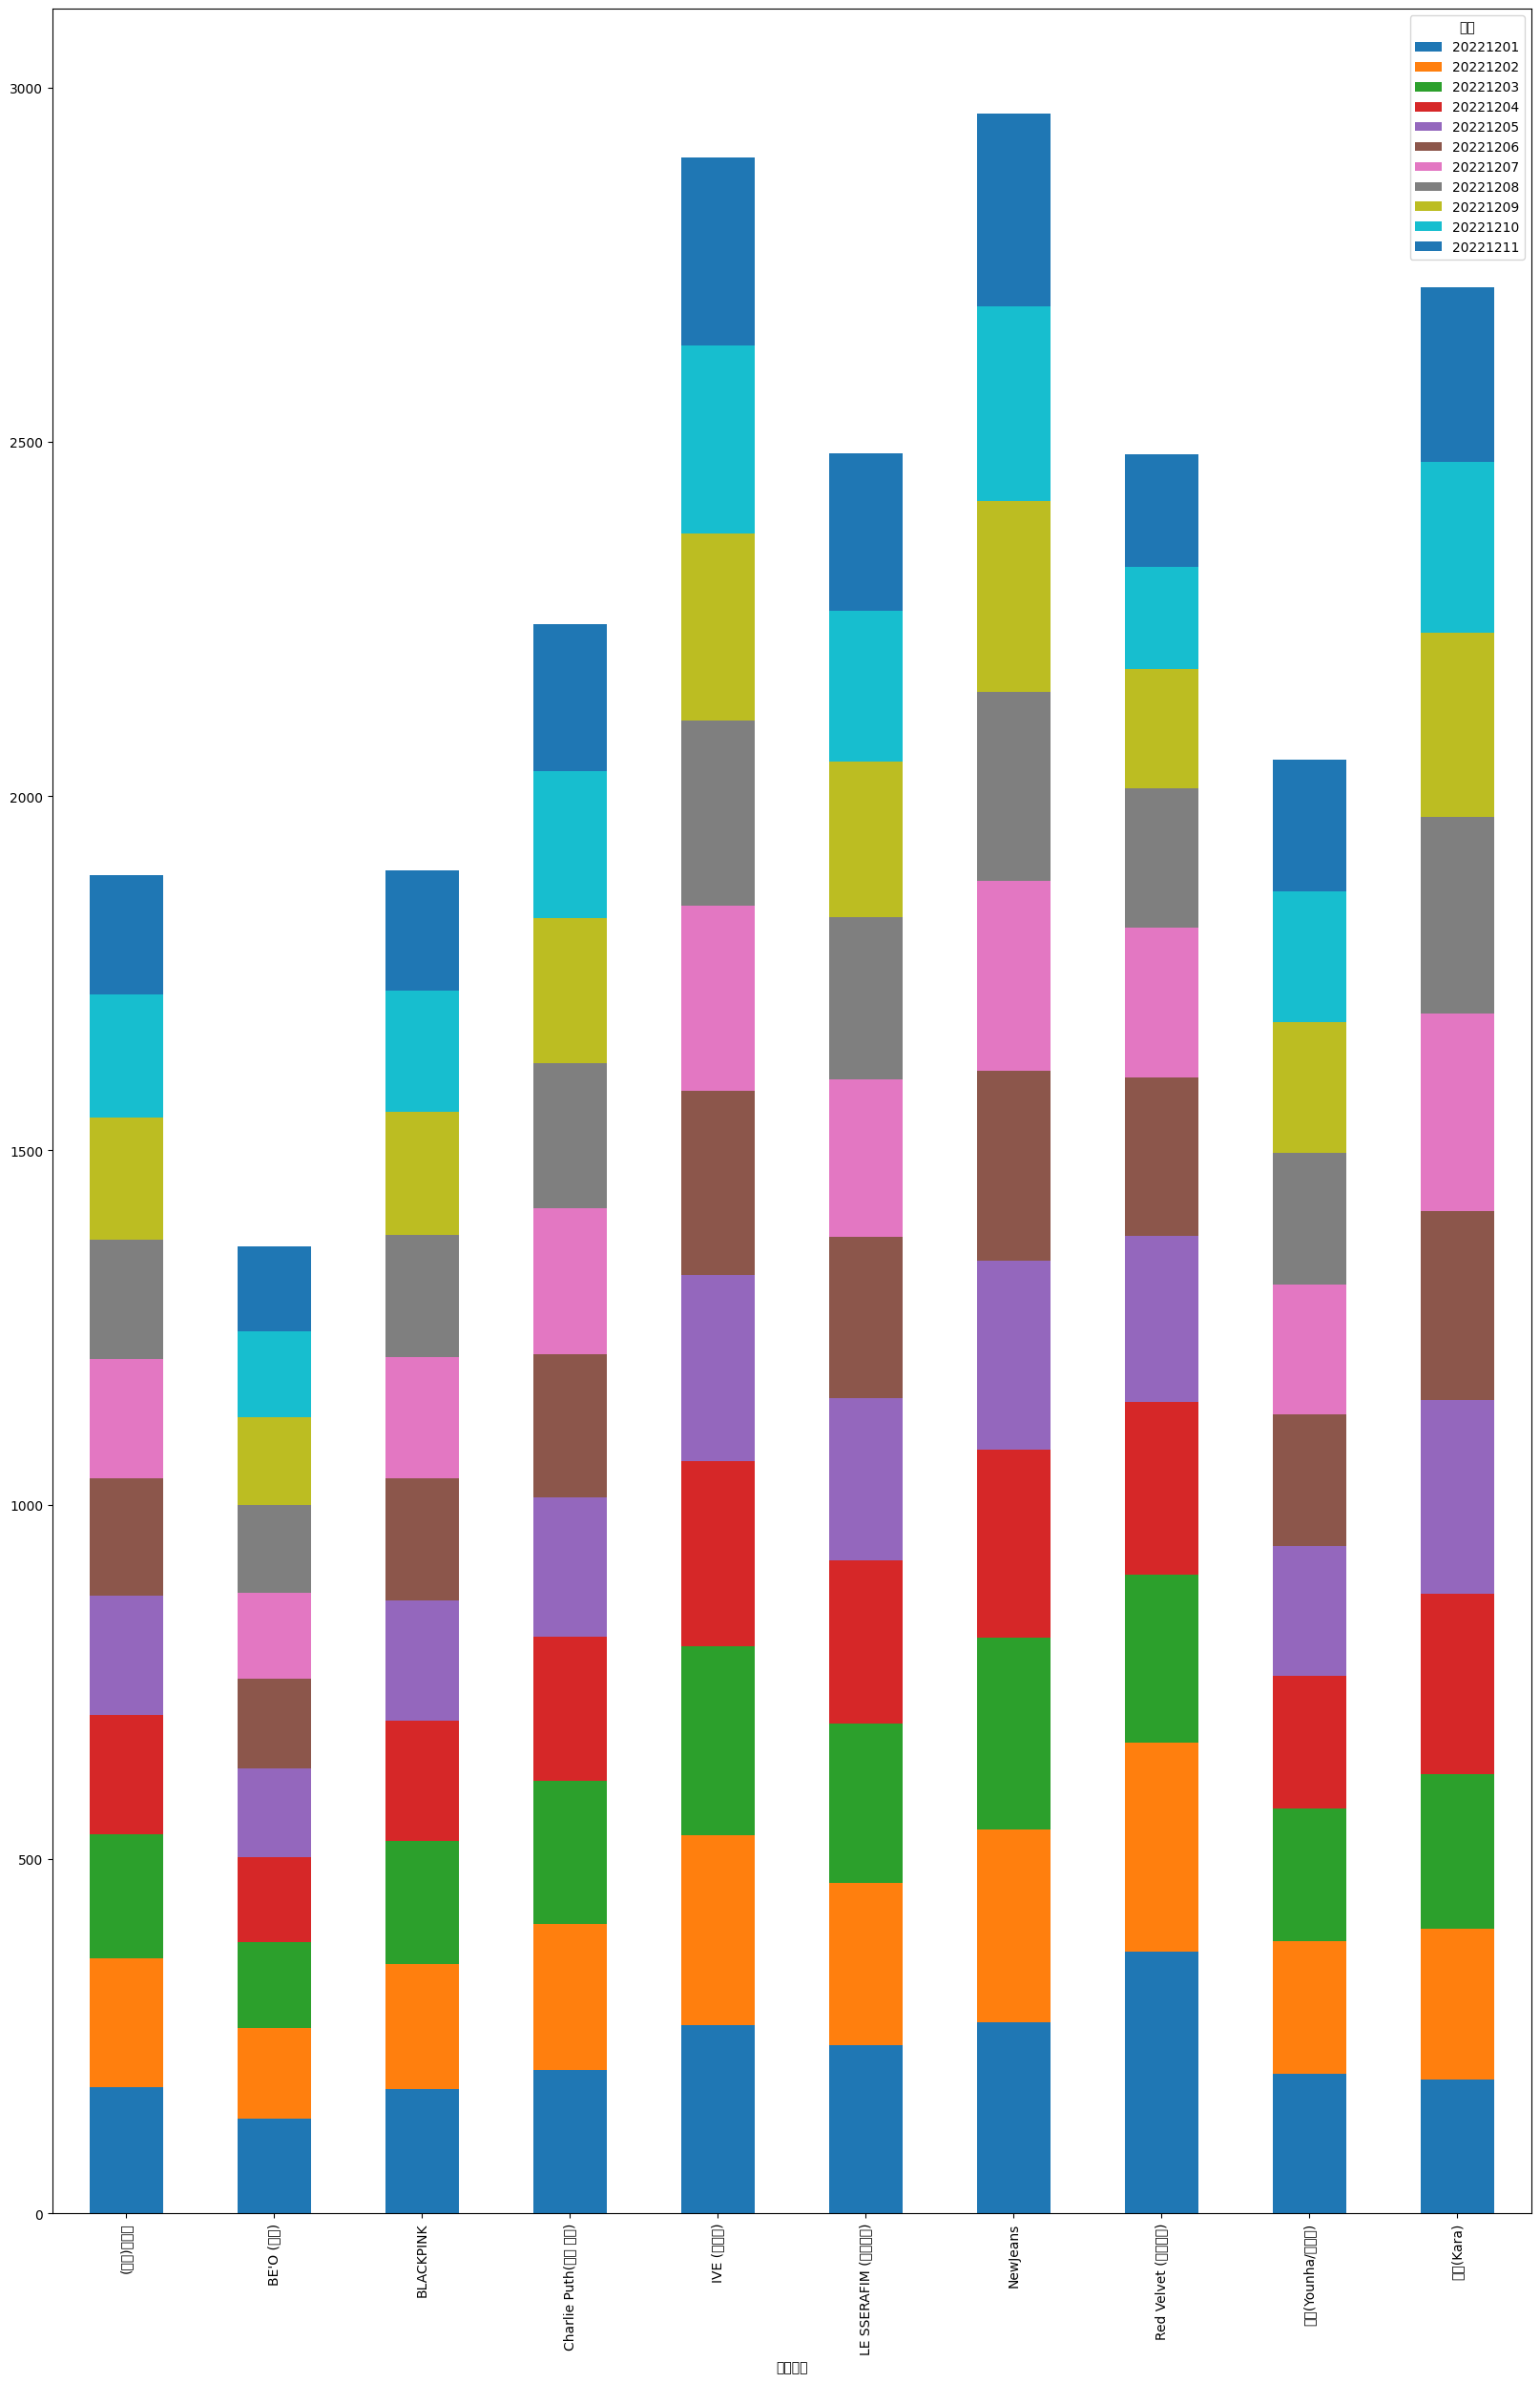

In [535]:
df_bugs_values_top_pivot.plot(kind="bar", stacked=True, figsize=(20, 30)) 

In [458]:
import pandas as pd 

In [461]:
import matplotlib.pyplot as plt

In [ ]:
top_10.plot.bar(color="gray")

In [389]:
a = pd.date_range("20221201", "20221211", freq="d")

In [419]:
a = pd.date_range("20221201","20221211")

In [422]:
import datetime

In [423]:
date = "20221201"
date_format = "%Y%m%d"
dt = datetime.datetime.strptime(date, date_format)
print(f"type: {type(dt)}, value: {dt}")

type: <class 'datetime.datetime'>, value: 2022-12-01 00:00:00


In [405]:
for i in range (20221201, 20221212):
    print(i)

20221201
20221202
20221203
20221204
20221205
20221206
20221207
20221208
20221209
20221210
20221211


In [ ]:
pd.date_range("2023-01-01", "2023-01-02", freq="T")

In [369]:
date_1 = pd.to_datetime("2022-12-01")

In [246]:
bug_soup = soup.select("#CHARTday > table > tbody > tr:nth-child(2)")[0]


title = bug_soup.find("p", {"class":"title"}).text
singer = bug_soup.find("p", {"class":"artist"}).text
print( title, singer)
#CHARTday > table > tbody > tr:nth-child(2) > th > p > a


Hype Boy
 
NewJeans



In [234]:
bug_soup = soup.select("#CHARTday > table > tbody ")[0]

song = bug_soup.find_all("a")[2]
song.text

'사건의 지평선'

In [235]:
bug_soup = soup.select("#CHARTday > table > tbody ")[0]

song = bug_soup.find("p", {"class":"title"})
song.text

'\n사건의 지평선\n'

In [236]:
bug_soup = soup.select("#CHARTday > table > tbody ")[0]

song = bug_soup.find("p", {"class":"artist"})
song.text

'\n윤하(Younha/ユンナ)\n'

In [ ]:
#CHARTday > table > tbody > tr:nth-child(1) > th > p

In [ ]:
#CHARTday > table > tbody > tr:nth-child(1) > td:nth-child(4)
#CHARTday > table > tbody > tr:nth-child(1) > th > p
#CHARTday > table > tbody > tr:nth-child(1) > td:nth-child(8) > p > a

In [ ]:
#CHARTday > table > tbody > tr:nth-child(2) > th > p > a

In [433]:
#과제
# naver 무비 리뷰
# https:// movie.naver.com/movie/point/af/list.naver
# 100페이지 (네이버 평점 100페이지까지)
# 크롤링
# 번호 감상평 점수(7점이상 1, 7점이하 0)
# 방법1. bs 이용
# 방법2. pandas.read_html() #html에서 table 정보만 추출
# python 멀티프로세싱 모듈 
